# Homework 4

## 1) Preprocess Dataset

In [1]:
# import needed libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("diabetes.csv")

In [3]:
# check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# separate input from output variables
x = df.drop(columns=['Outcome'])
y = df['Outcome']

# normalize data as requested
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

# keep as a DataFrame for convenience when inspecting
X = pd.DataFrame(X, columns=x.columns)

## 2) Part A: Clustering

### 1.

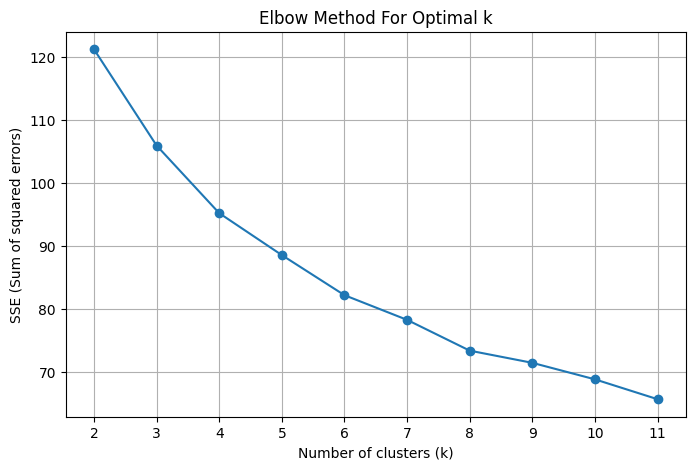

In [7]:
k_means_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
sse = []

# calculate SSE for each k
for k in k_means_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_) # inertia_ is the SSE

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(k_means_values, sse, marker='o')
plt.xticks(k_means_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of squared errors)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

### 2.

In [8]:
# fit KMeans with k=6
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# classify based on majority class of the cluster

# Map clusters to majority class
cluster_to_majority = {}
for cluster_id in range(k):
    labels_in_cluster = y[clusters == cluster_id]
    majority_class = np.bincount(labels_in_cluster).argmax() # counts how many times each class appears in the cluster and choose the most often one
    cluster_to_majority[cluster_id] = majority_class

# Predicted labels based on majority class
y_pred = np.array([cluster_to_majority[c] for c in clusters])

# compute the confusion matrix, accuracy, precision, recall and F1-score
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y, y_pred, average='weighted')
print("F1-score:", f1)

Confusion Matrix:
 [[390 110]
 [119 149]]
Accuracy: 0.7018229166666666
Precision: 0.6995855884301365
Recall: 0.7018229166666666
F1-score: 0.7006066409587589


Although the model achieved moderate performance (accuracy, precision, recall and F1-score ≈ 0.70), it cannot be considered a good classification model.

K-Means is an unsupervised algorithm, meaning it has no prior knowledge of the dataset’s true labels. It aims to minimize the distance between data points and their assigned cluster centroids rather than to separate classes effectively. As a result, clusters may contain mixed class labels.

There are several limitations to using clustering algorithms like K-Means for classification tasks. Because it does not use class information during training, the clusters formed may not align with the actual labels. The number of clusters (*k*) must be chosen manually, and an inappropriate value can lead to poor classification performance, either underfitting (too few clusters) or overfitting (too many clusters). Additionally, K-Means assumes that each cluster is compact and well-separated, but in real-world datasets, classes often overlap or have complex, non-spherical shapes that clustering cannot accurately capture.

In summary, clustering algorithms such as K-Means are not well-suited for classification tasks due to their unsupervised nature, sensitivity to the choice of *k*, and assumptions about data distribution. For classification problems, supervised learning algorithms that learn directly from labeled examples are more suitable and generally achieve better performance.

### 3.

In [9]:
# print class distribution
unique_classes, class_counts = np.unique(y, return_counts=True)
print("Class Distribution:")
for cls, count in zip(unique_classes, class_counts):
    print(f"   Class {cls}: {count} samples")

# print cluster centers
print("\nCluster Centers:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"   Cluster {i}: [{', '.join(f'{v:.4f}' for v in center)}]")

# not required but useful to analyze clusters

print("-------------------------------------------------------------------------------")

cluster = []
for cluster_id in range(6):
    labels_in_cluster = y[clusters == cluster_id]
    total_in_cluster = len(labels_in_cluster)
    
    if total_in_cluster == 0:
        continue
    
    # count each class
    class_0_count = np.sum(labels_in_cluster == 0)
    class_1_count = np.sum(labels_in_cluster == 1)
    
    # calculate purity
    majority_count = max(class_0_count, class_1_count)
    purity = majority_count / total_in_cluster
    
    cluster.append({
        'cluster_id': cluster_id,
        'total': total_in_cluster,
        'class_0': class_0_count,
        'class_1': class_1_count,
        'majority_class': 0 if class_0_count > class_1_count else 1,
        'purity': purity,
    })
    
    print(f"Cluster {cluster_id}: {total_in_cluster} samples")
    print(f"   Class 0: {class_0_count} ({class_0_count/total_in_cluster*100:.1f}%)")
    print(f"   Class 1: {class_1_count} ({class_1_count/total_in_cluster*100:.1f}%)")
    print(f"   Majority class: {0 if class_0_count > class_1_count else 1}")
    print(f"   Purity: {purity:.3f}\n")

for c in cluster:
    print(f"Cluster {c['cluster_id']}: {c['purity']:.3f}")

Class Distribution:
   Class 0: 500 samples
   Class 1: 268 samples

Cluster Centers:
   Cluster 0: [0.1106, 0.7511, 0.6104, 0.3454, 0.2477, 0.5525, 0.2330, 0.1354]
   Cluster 1: [0.1040, 0.4980, 0.5489, 0.2387, 0.0693, 0.4474, 0.1479, 0.0698]
   Cluster 2: [0.3504, 0.6794, 0.6591, 0.0517, 0.0096, 0.4399, 0.1390, 0.5969]
   Cluster 3: [0.2134, 0.5920, 0.0000, 0.0153, 0.0000, 0.3831, 0.1325, 0.1619]
   Cluster 4: [0.2833, 0.6184, 0.6045, 0.0166, 0.0109, 0.4740, 0.1418, 0.1960]
   Cluster 5: [0.5016, 0.6527, 0.6281, 0.3200, 0.1427, 0.5109, 0.1965, 0.3812]
-------------------------------------------------------------------------------
Cluster 0: 134 samples
   Class 0: 61 (45.5%)
   Class 1: 73 (54.5%)
   Majority class: 1
   Purity: 0.545

Cluster 1: 280 samples
   Class 0: 254 (90.7%)
   Class 1: 26 (9.3%)
   Majority class: 0
   Purity: 0.907

Cluster 2: 69 samples
   Class 0: 43 (62.3%)
   Class 1: 26 (37.7%)
   Majority class: 0
   Purity: 0.623

Cluster 3: 35 samples
   Class 0: 19 

To choose the 3 most discriminative clusters, we compute the purity of each cluster, which measures the proportion of the majority class within that cluster. Higher purity indicates that the cluster more clearly represents a single class. Based on the computed purities, clusters 1, 2, and 5 are the most discriminative, with purities of 0.907, 0.623, and 0.608, respectively.

Based on the results, cluster 1 has the highest purity (0.907) and predominantly contains Class 0 patients (non-diabetic). This indicates that it effectively groups patients with similar non-diabetic characteristics. Clusters 2 and 5, with purities around 0.6, are moderately discriminative, meaning they separate a fair proportion of diabetic and non-diabetic patients, but there is still notable class overlap within these clusters.

In conclusion, clusters 1, 2 and 5 are the most discriminative among all clusters. Cluster 1 is the most reliable for identifying non-diabetic patients, while clusters 2 and 5 provide moderate, though less precise, separation between diabetic and non-diabetic patients.

## 3) Part B: PCA

### 1.

Number of components to explain at least 80% variance: 5


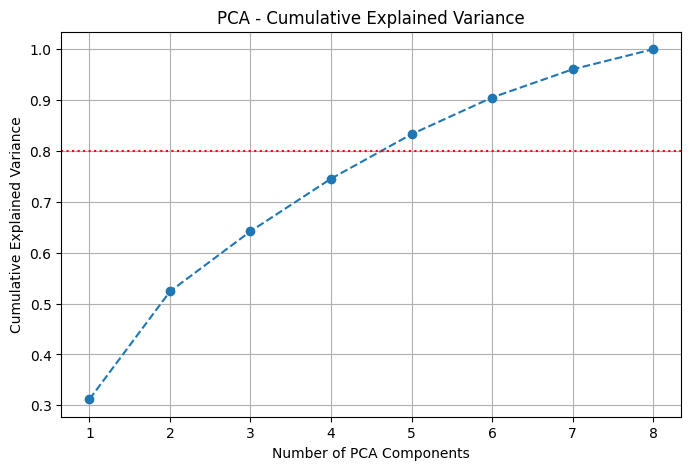

In [10]:
# apply pca
pca = PCA()
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance_ratio)

n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components to explain at least 80% variance: {n_components_80}")

# plot the graph
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.axhline(y=0.8, color='r', linestyle=':') 
plt.grid(True)
plt.show()


### 2.

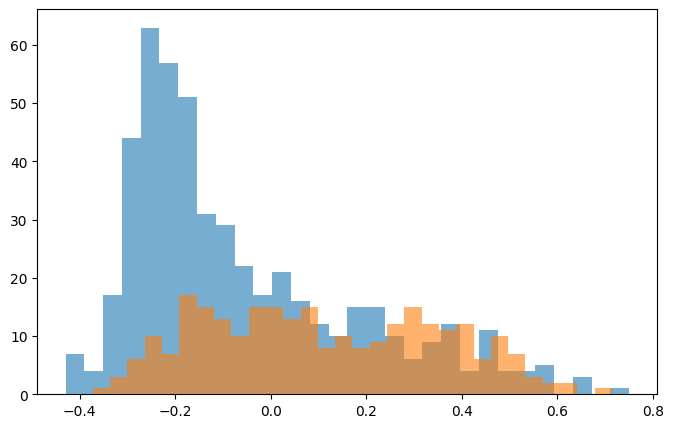

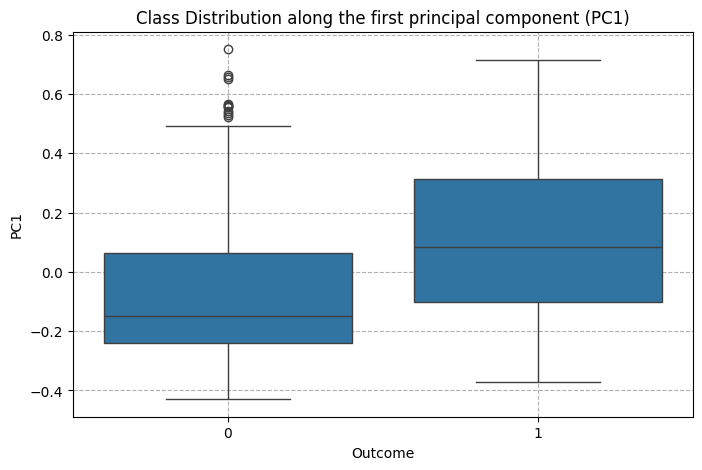

In [ ]:
pca = PCA(n_components=1)

# add a collumn with the first principal component to the dataframe
df['PC1'] = pca.fit_transform(X)
X_lda = pca.fit_transform(X, y)

# plot a distribution graph
plt.figure(figsize=(8, 5))
for label in sorted(set(y)):
    plt.hist(X_lda[y == label], bins=30, alpha=0.6, label=f'Class {label}')

# plot the a boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Outcome', y='PC1', data=df)
plt.title('Class Distribution along the first principal component (PC1)')
plt.xlabel('Outcome')
plt.ylabel('PC1')
plt.grid(linestyle='--')
plt.show()

# AINDA FALTA REVER E MAYBE COMPLETAR

The boxplot shows the class distribution along the first principal component (PC1). From the boxplot, we can observe that class 0 (non-diabetic) tends to have lower PC1 values, while class 1 (diabetic) generally has higher PC1 values. In class 0, the median of PC1 is below zero, indicating that most non-diabetic patients have negative PC1 scores. Class 1 has a wider interquartile range (IQR) than class 0, suggesting greater variability in PC1 values among diabetic patients. Additionally, there are some outliers in class 0 above the upper whisker, indicating that a few non-diabetic patients have unusually high PC1 values. Despite the difference in medians, the boxes overlap around 0.0, meaning that PC1 alone does not perfectly separate the two classes.

### 3.

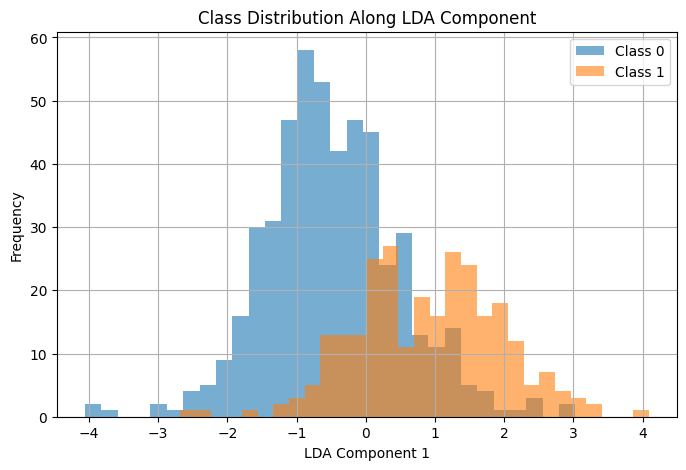

In [12]:
# apply lda
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(8, 5))
for label in sorted(set(y)):
    plt.hist(X_lda[y == label], bins=30, alpha=0.6, label=f'Class {label}')

plt.title("Class Distribution Along LDA Component")
plt.xlabel("LDA Component 1")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

LDA finds directions (linear combinations of features) where class separability is maximized.

As observed in the graph, the classes are moderately overlapped (more in the range [-1, 2]). This means the classes are partially separable, which on turn means they might have they may vary in similar ways across features, or correlated features in the dataset.

If the distribuitions for each class were far apart, LDA would perform very well for classifition, since the classes are very separated and a projection that maximizes class separability would be very easy to find.

On the other hand, if the classes were very overlapped, and the distributions were very similar, they would not be linearly separable, which means LDA would not perform well for classification. In this case, it would be better to consider non-linear methods.

### 4.

The goal of PCA is dimensionality reduction, not building a discriminating between classes. LDA, on the other hand, is a supervised classifier with the goal of precisely building a rule to decide which class a sample belongs to, by optimizing class separability.

As we can observe, the PCA plot shows high overlap between classes, because PCA simply finds the directions of that maximize variance in the dataset. The LDA plot shows the separation between classes much more clearly, as it is designed to build a discriminant rule to tell the difference between linearly separable classes.

Therefore, based on the results, LDA is much better than PCA to build discriminant rule. While PCA maximizes overall variance in the dataset without considering class labels, LDA maximizes the separation between classes while minimizing within class variance, allowing for a much easier class discrimination and, therefore, classification.